### PET from BOM AWRA-L for MDB

In [29]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
dirpet = '/g/data/oe9/user/rg6346/PET_BOM_AWRA/pet_avg_Actual_month.nc'
petnc = xr.open_dataset(dirpet)
petnc = petnc.rename({'e0_avg':'pet'})
petnc = petnc.where(petnc>=0, np.nan)
petnc = petnc.squeeze()
petnc

<xarray.Dataset>
Dimensions:      (latitude: 681, longitude: 841, nv: 2, time: 217)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 ...
  * latitude     (latitude) float64 -10.0 -10.05 -10.1 -10.15 -10.2 -10.25 ...
  * longitude    (longitude) float64 112.0 112.0 112.1 112.2 112.2 112.2 ...
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv) float64 3.652e+04 3.656e+04 3.656e+04 3.658e+04 ...
    pet          (time, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    var_name:  e0_avg

### mask for MDB

In [25]:
mask_path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWRA.nc'
petmask = xr.open_dataarray(mask_path)
petnc = petnc.where(petmask, drop=True)
petnc

<xarray.Dataset>
Dimensions:      (latitude: 261, longitude: 278, nv: 2, time: 217)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-31 2000-02-29 2000-03-31 ...
  * latitude     (latitude) float64 -24.65 -24.7 -24.75 -24.8 -24.85 -24.9 ...
  * longitude    (longitude) float64 138.6 138.7 138.7 138.8 138.8 138.8 ...
Dimensions without coordinates: nv
Data variables:
    time_bounds  (time, nv, latitude, longitude) float64 nan nan nan nan nan ...
    pet          (time, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    var_name:  e0_avg

### plot sample

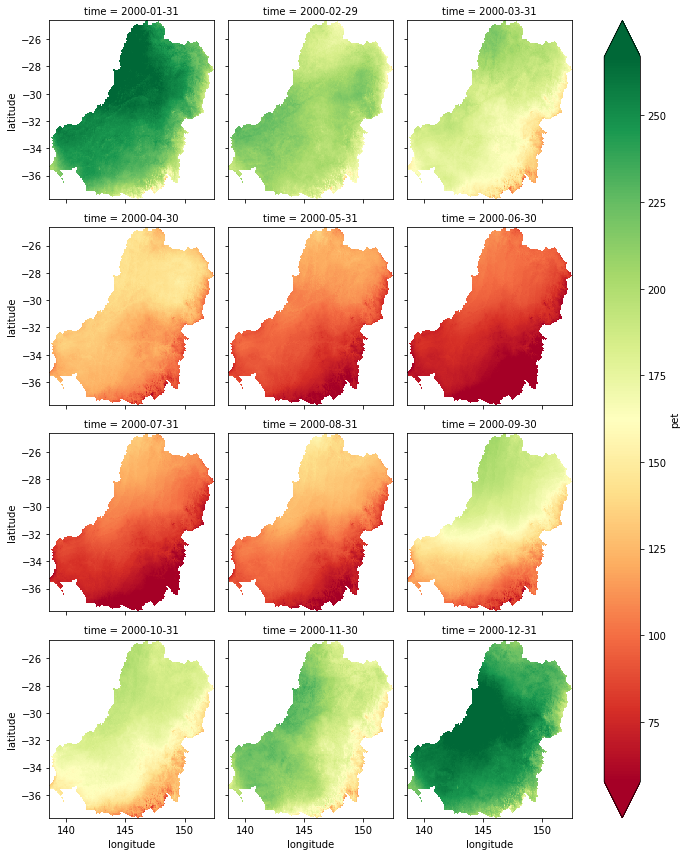

In [26]:
%matplotlib inline
petnc.pet.isel(time = range(0,12)).plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')
# EVI_monthly.isel(time=range(0,12)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')

### save to nc

In [27]:
# /g/data/oe9/project/team-drip/ENV_5km_month
outpath = '/g/data/oe9/project/team-drip/ENV_5km_month/PET_5km_month.nc'
petnc.to_netcdf(outpath, mode = 'w')

In [12]:
pet_yearly=petnc.pet.resample(time="1A").mean(dim='time')
pet_yearly

<xarray.DataArray 'pet' (time: 19, latitude: 261, longitude: 278)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...
  * latitude   (latitude) float64 -24.65 -24.7 -24.75 -24.8 -24.85 -24.9 ...
  * longitude  (longitude) float64 138.6 138.7 138.7 138.8 138.8 138

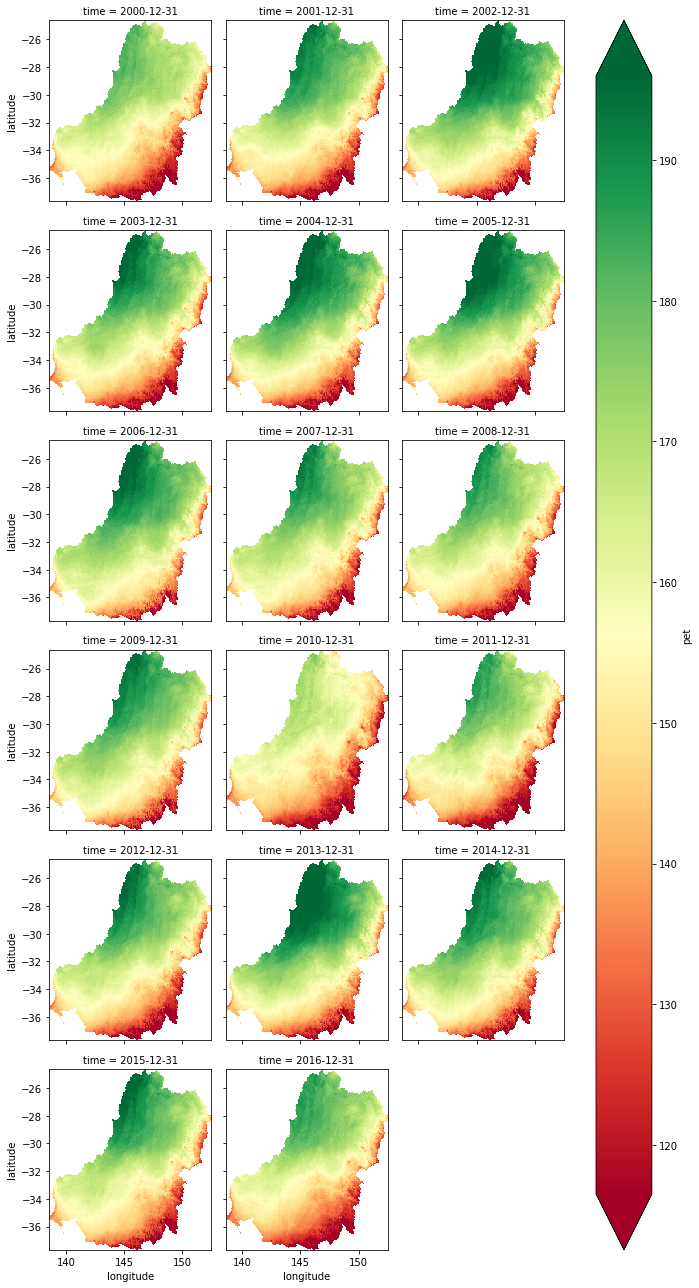

In [23]:
%matplotlib inline
pet_yearly.isel(time = range(0,17)).plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')

In [20]:
pet_ts = pet_yearly.mean(dim={'latitude', 'longitude'}, skipna=True, keep_attrs=False)
pet_ts

<xarray.DataArray 'pet' (time: 19)>
array([ 156.564359,  161.035044,  168.366271,  162.451581,  166.070654,
        166.066911,  167.255779,  162.131285,  159.444846,  164.644933,
        149.888832,  156.134568,  161.078117,  168.005211,  164.74465 ,
        161.468709,  156.667994,  164.922428,  202.559257])
Coordinates:
  * time     (time) datetime64[ns] 2000-12-31 2001-12-31 2002-12-31 ...

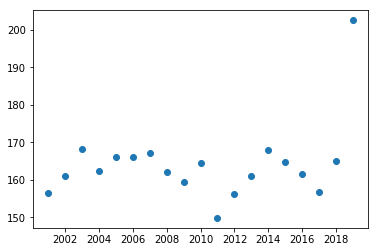

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# ts = pet_ts.pet
# ts.plot()
# x 
plt.plot_date(pet_ts.time,pet_ts)
plt.show()

### Plot sample of PET (monthly)

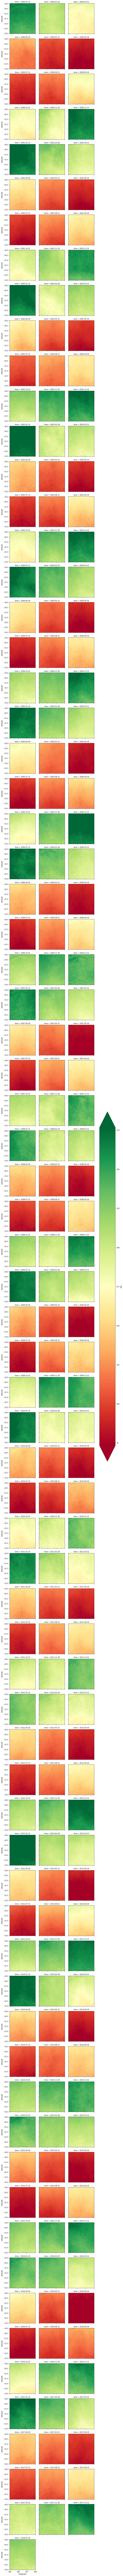

In [84]:
%matplotlib inline
petnc.pet.sel(latitude=slice(-30, -33),longitude=slice(145,148)).plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')


In [93]:
sa = petnc.pet.sel(latitude=slice(-30, -33),longitude=slice(145,148))
sa.shape

(217, 61, 61)

In [97]:
saa = scipy.ndimage.zoom(sa, 2, order=1)
saa.shape#.plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')

(434, 122, 122)

In [49]:
import scipy.ndimage
x = petnc.pet.isel(time=range(0,1))
xx = scipy.ndimage.zoom(x, 1, order=1)

xx.shape

xx.max()


nan

In [89]:
# xx.imshow()
import matplotlib.pyplot as plt
plt.plot.imshow(sa)
# plt.ylabel()
# plt.show()

AttributeError: 'function' object has no attribute 'imshow'